In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [10]:
# Cargar dataset
dfCleaned = pd.read_csv('amazon_reviews_Cleaned.csv')

In [11]:
dfCleaned.head()

,Unnamed: 0,overall,reviewText
0,0,4.0,issues
1,1,5.0,purchased device worked advertised never much ...
2,2,4.0,works expected sprung higher capacity think ma...
3,3,5.0,think worked greathad diff bran gb card went s...
4,4,5.0,bought retail packaging arrived legit orange e...


In [12]:
# Apply TF-IDF 
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfCleaned['reviewText'])

# Define the target variable as integer labels
y = dfCleaned['overall'].astype(int)

In [13]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 104460 stored elements and shape (4914, 5000)>
  Coords	Values
  (0, 1811)	1.0
  (1, 2960)	0.2390691997557985
  (1, 901)	0.2500956641441643
  (1, 4814)	0.22041352975002462
  (1, 65)	0.3079511880305262
  (1, 2283)	0.23746924750824877
  (1, 2235)	0.22880268690799568
  (1, 2527)	0.15894729456975054
  (1, 2124)	0.16342700659146378
  (1, 3614)	0.2634346235438177
  (1, 980)	0.3515768967137597
  (1, 2004)	0.25280027831644336
  (1, 4010)	0.3197017006470681
  (1, 371)	0.4658817477827855
  (2, 4826)	0.10167611425771444
  (2, 1187)	0.21026831614423724
  (2, 3834)	0.4017209024878068
  (2, 1617)	0.26622741443620596
  (2, 460)	0.18410928375398103
  (2, 4235)	0.20417737012953208
  (2, 2031)	0.22707996152754703
  (2, 320)	0.22808251479726946
  (2, 1032)	0.32830745830827224
  (2, 4490)	0.2923424981405928
  (2, 2453)	0.37010345303225173
  :	:
  (4912, 3723)	0.28806210890236555
  (4912, 1308)	0.4263389161515658
  (4912, 3453)	0.305510277334716

In [14]:
print(y)

0       4
1       5
2       4
3       5
4       5
       ..
4909    1
4910    5
4911    5
4912    5
4913    5
Name: overall, Length: 4914, dtype: int32


In [15]:
# Separar en Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Modelos (algunos One-vs-Rest)
models = {
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (OvR)": OneVsRestClassifier(SVC(probability=True)),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    # "Gaussian Naive Bayes": GaussianNB(), # Gaussian Naive Bayes me daba problemas, por esto esta comentado
    "Multinomial Naive Bayes": MultinomialNB()
}

c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\sit


Results for Logistic Regression (OvR):
Accuracy: 0.8098
              precision    recall  f1-score   support

           1       0.47      0.16      0.24        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
           5       0.82      1.00      0.90       790

    accuracy                           0.81       983
   macro avg       0.26      0.23      0.23       983
weighted avg       0.68      0.81      0.73       983

Confusion Matrix:
 [[  7   0   0   0  37]
 [  3   0   0   0   9]
 [  3   0   0   0  27]
 [  1   0   0   0 106]
 [  1   0   0   0 789]]


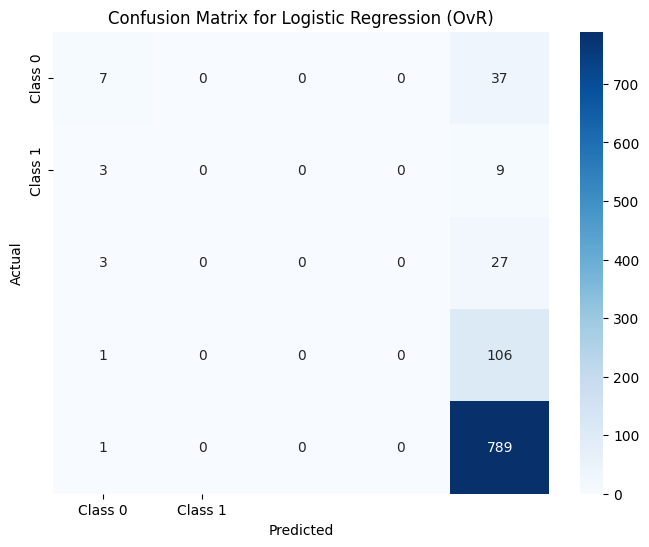


Results for Decision Tree:
Accuracy: 0.7304
              precision    recall  f1-score   support

           1       0.30      0.36      0.33        44
           2       0.00      0.00      0.00        12
           3       0.14      0.10      0.12        30
           4       0.17      0.13      0.15       107
           5       0.83      0.87      0.85       790

    accuracy                           0.73       983
   macro avg       0.29      0.29      0.29       983
weighted avg       0.71      0.73      0.72       983

Confusion Matrix:
 [[ 16   0   3   4  21]
 [  5   0   2   0   5]
 [  2   1   3   4  20]
 [  1   0   2  14  90]
 [ 30   3  12  60 685]]


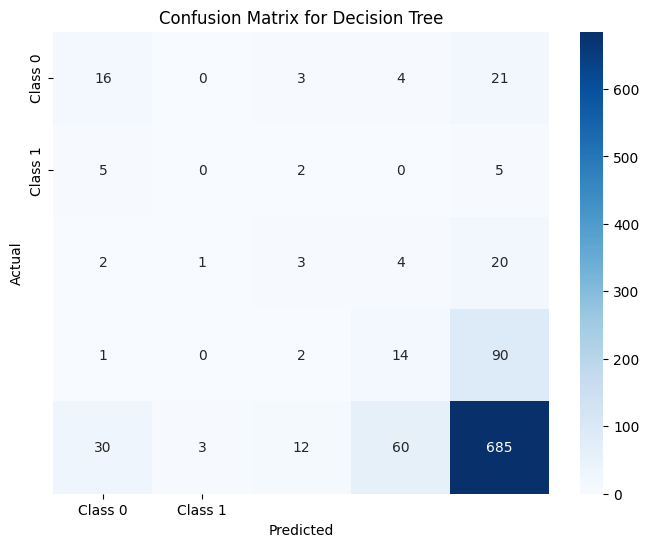

c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\sit


Results for Random Forest:
Accuracy: 0.8026
              precision    recall  f1-score   support

           1       0.20      0.02      0.04        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
           5       0.81      1.00      0.89       790

    accuracy                           0.80       983
   macro avg       0.20      0.20      0.19       983
weighted avg       0.66      0.80      0.72       983

Confusion Matrix:
 [[  1   0   0   0  43]
 [  2   0   0   0  10]
 [  1   0   0   0  29]
 [  1   0   0   0 106]
 [  0   0   0   2 788]]


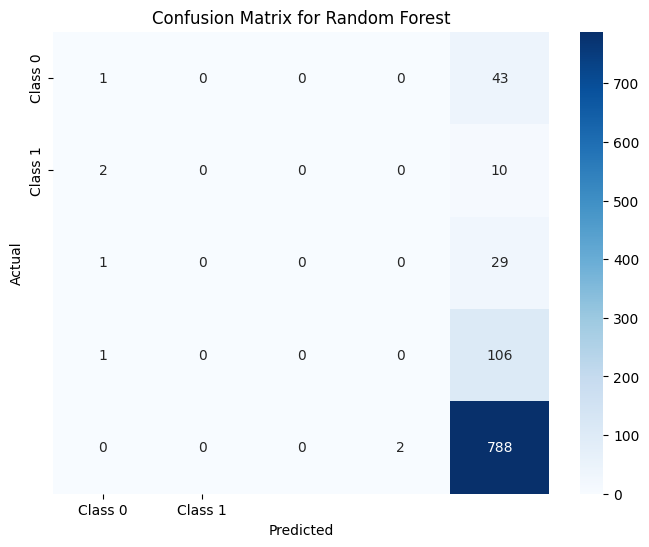

c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\sit


Results for SVM (OvR):
Accuracy: 0.8138
              precision    recall  f1-score   support

           1       0.59      0.23      0.33        44
           2       0.00      0.00      0.00        12
           3       1.00      0.03      0.06        30
           4       0.00      0.00      0.00       107
           5       0.82      1.00      0.90       790

    accuracy                           0.81       983
   macro avg       0.48      0.25      0.26       983
weighted avg       0.71      0.81      0.74       983

Confusion Matrix:
 [[ 10   0   0   0  34]
 [  4   0   0   0   8]
 [  2   0   1   0  27]
 [  1   0   0   0 106]
 [  0   0   0   1 789]]


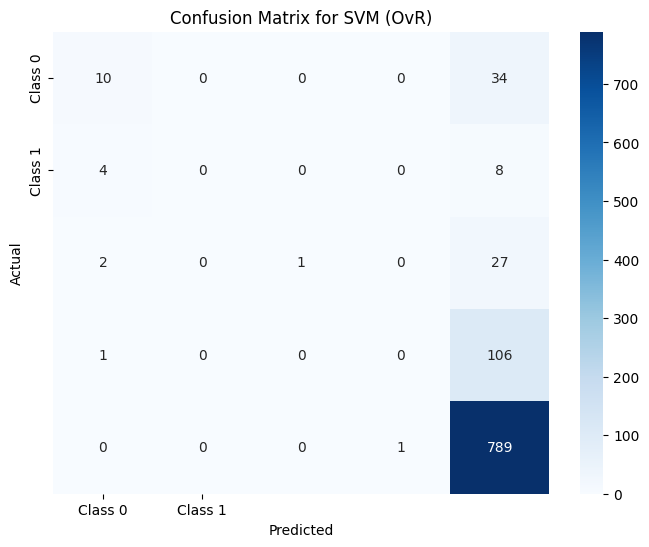


Results for K-NN:
Accuracy: 0.7935
              precision    recall  f1-score   support

           1       0.50      0.27      0.35        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.10      0.03      0.04       107
           5       0.83      0.97      0.89       790

    accuracy                           0.79       983
   macro avg       0.29      0.25      0.26       983
weighted avg       0.70      0.79      0.74       983

Confusion Matrix:
 [[ 12   1   5   1  25]
 [  5   0   1   1   5]
 [  3   0   0   2  25]
 [  3   0   0   3 101]
 [  1   0   1  23 765]]


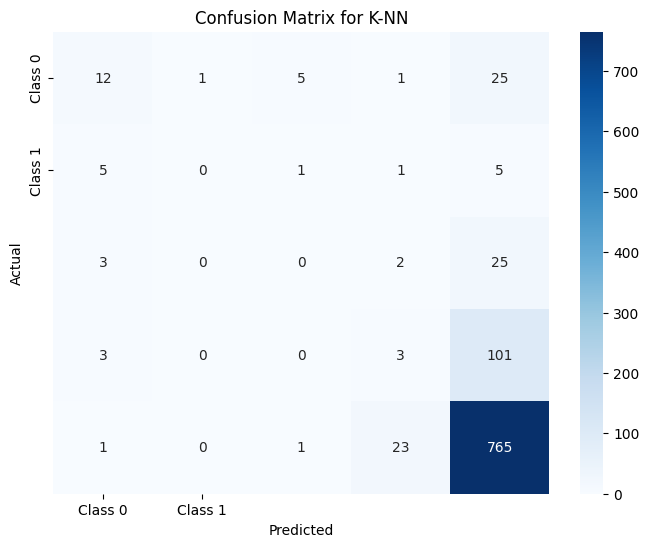


Results for Gradient Boosting:
Accuracy: 0.8067
              precision    recall  f1-score   support

           1       0.45      0.20      0.28        44
           2       0.17      0.08      0.11        12
           3       0.40      0.07      0.11        30
           4       0.20      0.02      0.03       107
           5       0.83      0.99      0.90       790

    accuracy                           0.81       983
   macro avg       0.41      0.27      0.29       983
weighted avg       0.72      0.81      0.74       983

Confusion Matrix:
 [[  9   1   1   2  31]
 [  4   1   0   0   7]
 [  3   0   2   2  23]
 [  2   1   0   2 102]
 [  2   3   2   4 779]]


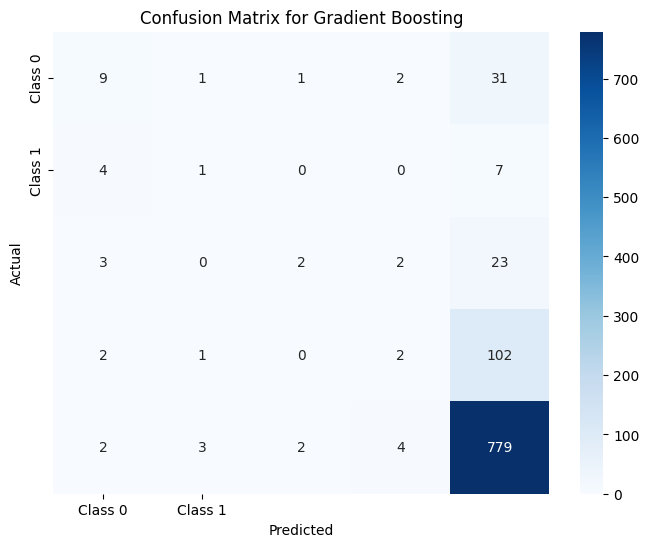


Results for Bernoulli Naive Bayes:
Accuracy: 0.7721
              precision    recall  f1-score   support

           1       0.35      0.32      0.33        44
           2       0.00      0.00      0.00        12
           3       0.14      0.03      0.05        30
           4       0.15      0.09      0.12       107
           5       0.85      0.93      0.89       790

    accuracy                           0.77       983
   macro avg       0.30      0.27      0.28       983
weighted avg       0.72      0.77      0.74       983

Confusion Matrix:
 [[ 14   1   0  11  18]
 [  4   0   0   3   5]
 [  6   0   1   4  19]
 [  5   0   1  10  91]
 [ 11   2   5  38 734]]


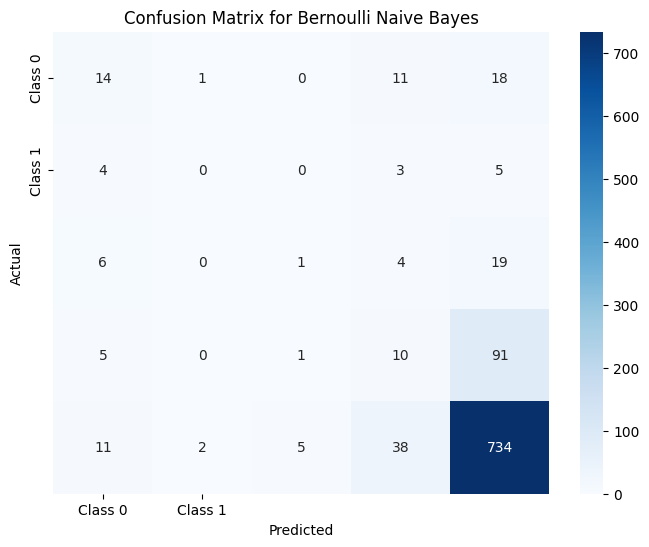

c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\sit


Results for Multinomial Naive Bayes:
Accuracy: 0.8037
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
           5       0.80      1.00      0.89       790

    accuracy                           0.80       983
   macro avg       0.16      0.20      0.18       983
weighted avg       0.65      0.80      0.72       983

Confusion Matrix:
 [[  0   0   0   0  44]
 [  0   0   0   0  12]
 [  0   0   0   0  30]
 [  0   0   0   0 107]
 [  0   0   0   0 790]]


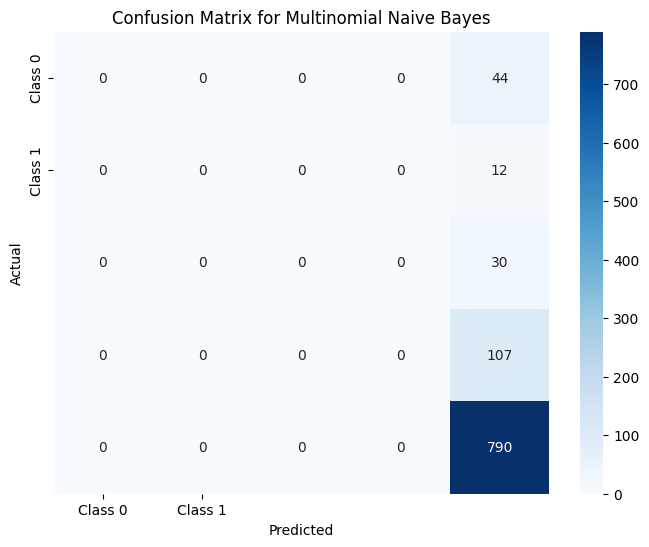

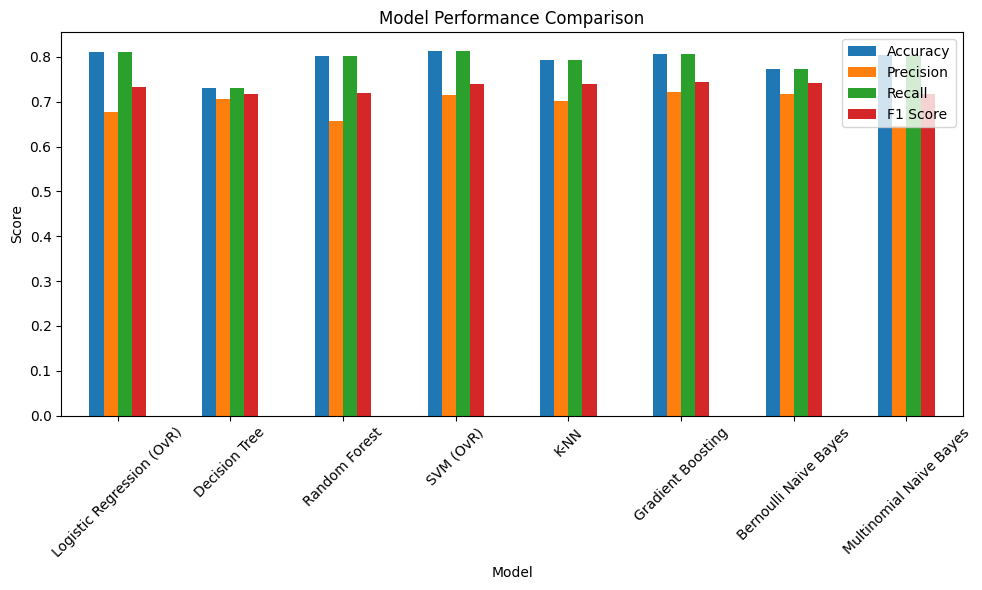

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Results dictionary to store evaluation metrics
results = {}

# Define a function for visualizing the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score']
    }
    
    # Print model evaluation details
    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name)

# Summarize results in a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_metrics = {metric: [] for metric in metrics}

for model_name, metrics_dict in results.items():
    for metric in metrics:
        model_metrics[metric].append(metrics_dict[metric])

# Create a DataFrame for better handling of the bar chart
import pandas as pd

df_metrics = pd.DataFrame(model_metrics, index=results.keys())

# Plot the bar chart for model performance
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Results for Logistic Regression (OvR):
Accuracy: 0.8098
MSE: 0.9430
              precision    recall  f1-score   support

           1       0.47      0.16      0.24        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
           5       0.82      1.00      0.90       790

    accuracy                           0.81       983
   macro avg       0.26      0.23      0.23       983
weighted avg       0.68      0.81      0.73       983

Confusion Matrix:
 [[  7   0   0   0  37]
 [  3   0   0   0   9]
 [  3   0   0   0  27]
 [  1   0   0   0 106]
 [  1   0   0   0 789]]


C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for Decision Tree:
Accuracy: 0.7345
MSE: 1.2096
              precision    recall  f1-score   support

           1       0.32      0.41      0.36        44
           2       0.14      0.08      0.11        12
           3       0.17      0.10      0.12        30
           4       0.16      0.13      0.15       107
           5       0.84      0.87      0.85       790

    accuracy                           0.73       983
   macro avg       0.33      0.32      0.32       983
weighted avg       0.71      0.73      0.72       983

Confusion Matrix:
 [[ 18   2   1   6  17]
 [  5   1   1   0   5]
 [  1   1   3   5  20]
 [  3   0   1  14  89]
 [ 29   3  12  60 686]]


C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for Random Forest:
Accuracy: 0.8026
MSE: 1.0346
              precision    recall  f1-score   support

           1       0.20      0.02      0.04        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
           5       0.81      1.00      0.89       790

    accuracy                           0.80       983
   macro avg       0.20      0.20      0.19       983
weighted avg       0.66      0.80      0.72       983

Confusion Matrix:
 [[  1   0   0   0  43]
 [  2   0   0   0  10]
 [  1   0   0   0  29]
 [  1   0   0   0 106]
 [  0   0   0   2 788]]


C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for SVM (OvR):
Accuracy: 0.8138
MSE: 0.8667
              precision    recall  f1-score   support

           1       0.59      0.23      0.33        44
           2       0.00      0.00      0.00        12
           3       1.00      0.03      0.06        30
           4       0.00      0.00      0.00       107
           5       0.82      1.00      0.90       790

    accuracy                           0.81       983
   macro avg       0.48      0.25      0.26       983
weighted avg       0.71      0.81      0.74       983

Confusion Matrix:
 [[ 10   0   0   0  34]
 [  4   0   0   0   8]
 [  2   0   1   0  27]
 [  1   0   0   0 106]
 [  0   0   0   1 789]]

Results for K-NN:
Accuracy: 0.7935
MSE: 0.7833
              precision    recall  f1-score   support

           1       0.50      0.27      0.35        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.10      0.03      0.04       107
    

C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

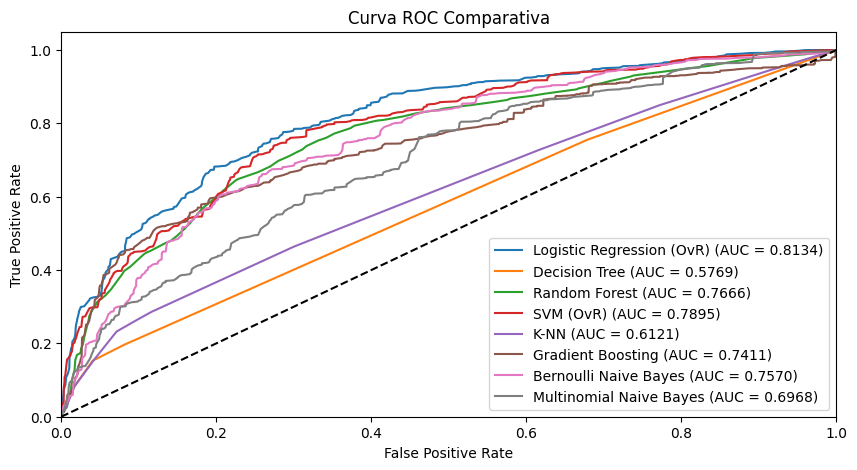

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Cargar dataset
dfCleaned = pd.read_csv('amazon_reviews_Cleaned.csv')

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfCleaned['reviewText'])
y = dfCleaned['overall'].astype(int)

# Binarizar las etiquetas para la curva ROC multiclase
y_bin = label_binarize(y, classes=np.unique(y))

# Separar en Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Modelos (algunos One-vs-Rest)
models = {
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (OvR)": OneVsRestClassifier(SVC(probability=True)),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Entrenar y evaluar modelos
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score'],
        "MSE": mse,
        "ROC AUC": roc_auc
    }

    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MSE: {mse:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Crear gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(y_test_bin.shape[1]):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= y_test_bin.shape[1]
    plt.plot(all_fpr, mean_tpr, label=f'{model_name} (AUC = {results[model_name]["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar dataset
dfCleaned = pd.read_csv('amazon_reviews_Cleaned.csv')

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfCleaned['reviewText'])
y = dfCleaned['overall'].astype(int)

# Separar en Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a buscar para cada modelo
param_grid = {
    "Logistic Regression (OvR)": {
        'estimator__C': [0.1, 1, 10],
        'estimator__solver': ['newton-cg', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20],
        'criterion': ['gini']
    },
    "SVM (OvR)": {
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['linear', 'rbf']
    },
    "K-NN": {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Crear los modelos base
models = {
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (OvR)": OneVsRestClassifier(SVC(probability=True)),
    "K-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Buscar los mejores hiperparámetros
best_params = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Imprimir los mejores hiperparámetros encontrados
for model_name, params in best_params.items():
    print(f"Mejores hiperparámetros para {model_name}:")
    print(params)
    print("\n")

C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

Mejores hiperparámetros para Logistic Regression (OvR):
{'estimator__C': 10, 'estimator__solver': 'newton-cg'}


Mejores hiperparámetros para Random Forest:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


Mejores hiperparámetros para SVM (OvR):
{'estimator__C': 1, 'estimator__kernel': 'linear'}


Mejores hiperparámetros para K-NN:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}





Results for Logistic Regression (OvR):
Accuracy: 0.8189
              precision    recall  f1-score   support

           1       0.69      0.55      0.61        44
           2       0.00      0.00      0.00        12
           3       0.67      0.07      0.12        30
           4       0.25      0.07      0.10       107
           5       0.84      0.98      0.91       790

    accuracy                           0.82       983
   macro avg       0.49      0.33      0.35       983
weighted avg       0.76      0.82      0.77       983

Confusion Matrix:
 [[ 24   1   0   4  15]
 [  6   0   0   0   6]
 [  2   0   2   1  25]
 [  1   0   1   7  98]
 [  2   0   0  16 772]]

Results for Decision Tree:
Accuracy: 0.7243
              precision    recall  f1-score   support

           1       0.26      0.30      0.28        44
           2       0.15      0.17      0.16        12
           3       0.08      0.07      0.07        30
           4       0.18      0.15      0.16       107
   

C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for Random Forest:
Accuracy: 0.8026
              precision    recall  f1-score   support

           1       0.20      0.02      0.04        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
           5       0.81      1.00      0.89       790

    accuracy                           0.80       983
   macro avg       0.20      0.20      0.19       983
weighted avg       0.66      0.80      0.72       983

Confusion Matrix:
 [[  1   0   0   0  43]
 [  2   0   0   0  10]
 [  1   0   0   0  29]
 [  1   0   0   0 106]
 [  0   0   0   2 788]]


C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for SVM (OvR):
Accuracy: 0.8291
              precision    recall  f1-score   support

           1       0.71      0.57      0.63        44
           2       0.00      0.00      0.00        12
           3       1.00      0.03      0.06        30
           4       0.33      0.01      0.02       107
           5       0.83      1.00      0.91       790

    accuracy                           0.83       983
   macro avg       0.58      0.32      0.32       983
weighted avg       0.77      0.83      0.76       983

Confusion Matrix:
 [[ 25   0   0   0  19]
 [  5   0   0   0   7]
 [  3   0   1   1  25]
 [  1   0   0   1 105]
 [  1   0   0   1 788]]

Results for K-NN:
Accuracy: 0.7935
              precision    recall  f1-score   support

           1       0.44      0.18      0.26        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.09      0.02      0.03       107
           5       0.82     

C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for Gradient Boosting:
Accuracy: 0.8037
              precision    recall  f1-score   support

           1       0.14      0.02      0.04        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       1.00      0.01      0.02       107
           5       0.81      1.00      0.89       790

    accuracy                           0.80       983
   macro avg       0.39      0.21      0.19       983
weighted avg       0.76      0.80      0.72       983

Confusion Matrix:
 [[  1   0   0   0  43]
 [  2   0   0   0  10]
 [  1   0   0   0  29]
 [  1   0   0   1 105]
 [  2   0   0   0 788]]

Results for Multinomial Naive Bayes:
Accuracy: 0.8037
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00       107
 

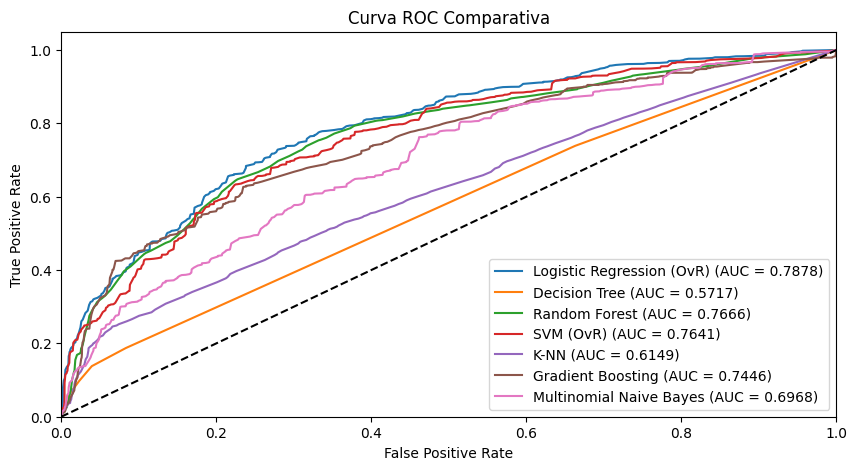

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Cargar dataset
dfCleaned = pd.read_csv('amazon_reviews_Cleaned.csv')

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfCleaned['reviewText'])
y = dfCleaned['overall'].astype(int)

# Binarizar las etiquetas para la curva ROC multiclase
y_bin = label_binarize(y, classes=np.unique(y))

# Separar en Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Modelos (algunos One-vs-Rest) con los mejores hiperparámetros
models = {
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000, C=10, solver='newton-cg')),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt', random_state=42),
    "SVM (OvR)": OneVsRestClassifier(SVC(probability=True, C=1, kernel='linear')),
    "K-NN": KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=5),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Entrenar y evaluar modelos
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score'],
        "ROC AUC": roc_auc
    }

    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Crear gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(y_test_bin.shape[1]):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= y_test_bin.shape[1]
    plt.plot(all_fpr, mean_tpr, label=f'{model_name} (AUC = {results[model_name]["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()

In [24]:
print(y_pred)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 